In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        self.adjList = {}
        self.size = size

        # Adjacency Matrix
        for i in range(size):
            self.adjMatrix.append([float('inf') if i != j else 0 for j in range(size)])

        # Adjacency List 
        for i in range(size): 
            self.adjList[i] = []
        
    # Add edges
    def add_edge(self, v1, v2, weight):
        if v1 == v2:
            print("Same vertex {} and {}".format(v1, v2))
            return
        elif (v1 < 1) or (v2 < 1) or (v1 > self.size) or (v2 > self.size):
            print("Please enter vertex between 1 - {}".format(self.size))
            return
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = weight
        
        add = 1
        # Adjacency List 
        for item in self.adjList[v1-1]:
            if item[0] == v2-1: 
                add = 0

        if add: 
            self.adjList[v1-1].append((v2-1, weight))

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1-1][v2-1] == 0:
            print("No edge between {} and {}".format(v1, v2))
            return
        elif (v1 < 1) or (v2 < 1) or (v1 > self.size) or (v2 > self.size):
            print("Please enter vertex between 1 - {}".format(self.size))
            return
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = float('inf')

        # Adjacency List 
        for i, (vertex, weight) in enumerate(self.adjList[v1-1]):
            if vertex == v2-1:
                del self.adjList[v1-1][i]
                break

    def getSize(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val), end=" "),
            print("\n")

    def print_list(self): 
        for vertex in self.adjList:
            print("{} -> ".format(vertex+1), end=" ")
            for item in self.adjList[vertex]:
                print("{}".format((item[0]+1,item[1])), end=" ")
            print("\n")

    # Check if graph is strongly connected
    def is_strongly_connected(self):
        # Perform DFS from each vertex
        for start in range(self.size):
            visited = [False] * self.size
            self._dfs(start, visited)

            # Check if all vertices were visited
            if not all(visited):
                return False

        return True
    
    # Helper function for DFS
    def _dfs(self, vertex, visited):
        visited[vertex] = True
        for neighbor in self.adjList[vertex]:
            if not visited[neighbor[0] - 1]:
                self._dfs(neighbor[0] - 1, visited)

    def plot_graph(self):
        fig, ax = plt.subplots()
        
        # Create a directed graph
        G = nx.DiGraph()
        
        # Add nodes
        num_vertices = len(self.adjMatrix)
        nodes = range(num_vertices)
        G.add_nodes_from(nodes)
        
        # Add edges
        for i in range(num_vertices):
            for j in range(num_vertices):
                weight = self.adjMatrix[i][j]
                if weight != 0 and weight != float('inf'):
                    G.add_edge(i, j, weight=weight)
        
        # Get node positions using a circular layout
        pos = nx.circular_layout(G)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, ax=ax)
        
        # Draw node labels
        labels = {i: i+1 for i in range(num_vertices)} # node labels are 1-based indices
        nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='white', ax=ax)
        
        # Draw edges with arrows and weights
        for edge in G.edges():
            start = edge[0]
            end = edge[1]
            weight = G[start][end]['weight']
            # calculate shift in arrow direction for weight placement
            shift = np.array(pos[end]) - np.array(pos[start])
            shift *= 0.2
            # add arrow
            ax.annotate("",
                        xy=pos[end], xycoords='data',
                        xytext=pos[start], textcoords='data',
                        arrowprops=dict(arrowstyle="->", color="black",
                                        shrinkA=5, shrinkB=5,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=0.2",
                                        ),
                        )
            # add weight
            ax.annotate(weight,
                        xy=pos[start], xycoords='data',
                        xytext=pos[end]-shift, textcoords='data',
                        fontsize=12,
                        ha='center', va='center')
        
        # Set axis limits and remove ticks
        ax.set_xlim([-1.2, 1.2])
        ax.set_ylim([-1.2, 1.2])
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Show the plot
        plt.show()


class priority_queue(object): 
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        if not self.pq:
            self.pq.append((vertex, weight))
            self.len += 1
            return

        # Binary Search
        low, high = 0, self.len-1

        while low <= high:
            mid = (low + high) // 2
            if self.pq[mid][1] < weight:
                low = mid + 1
            else:
                high = mid - 1

        self.pq.insert(low, (vertex, weight))
        self.len += 1

    def remove(self, vertex): 
        for v in self.pq: 
            if v[0] == vertex: 
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        return self.pq[0]

    def printQueue(self):
        print(self.pq)



class priority_queue_heap(object):
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        heapq.heappush(self.pq, (weight, vertex))
        self.len += 1

    def remove(self, vertex):
        for v in self.pq:
            if v[1] == vertex:
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        self.len -= 1
        return heapq.heappop(self.pq)

    def printQueue(self):
        print(self.pq)


            

In [15]:
import random
def generate_random_graph(size):
    # Initialize graph
    graph = Graph(size)

    # Generate a random permutation of vertices
    vertices = list(range(1, size + 1))
    random.shuffle(vertices)
    edges = 0
    # Add edges to create a random strongly connected graph
    for i in range(size):
        v1 = vertices[i]
        v2 = vertices[(i + 1) % size]
        weight = random.randint(1, 10)
        graph.add_edge(v1, v2, weight)
        edges += 1

    # # Add additional random edges to increase connectivity
    # for i in range(size * 2):
    #     v1 = random.randint(1, size)
    #     v2 = random.randint(1, size)
    #     if v1 != v2:
    #         weight = random.randint(1, 10)
    #         graph.add_edge(v1, v2, weight)
    #         edges += 1

    return graph,edges

In [16]:
def DijkstraAlgo_A(graph, source):
    d = []
    pi = []
    S = []
    pq = priority_queue()
    
    # Initialization 
    for v in range(graph.getSize()):
        d.append(float('inf'))
        pi.append(0)
        S.append(None)

    # Set source node 
    d[source-1] = 0

    # Push every vertex into priority queue using array based on d[]
    for vertex in range(len(d)):
        pq.add(vertex, d[vertex])

    while pq.len:
        
        # Get minimum weight    
        u = pq.getMin()[0] 
        S[u] = 1
        pq.remove(u)

        for v in range(graph.getSize()):
            # For every adjacent node
            if ((graph.adjMatrix[u][v] != 0) and 
                (graph.adjMatrix[u][v] != float('inf'))
                # Not already minimized 
                and (S[v] != 1) 
                # Can minimize d[v]
                and (d[v] > d[u] + graph.adjMatrix[u][v])): 
                pq.remove(v)
                d[v] = d[u] + graph.adjMatrix[u][v]
                pi[v] = u+1
                pq.add(v, d[v])

    return S, d, pi

In [39]:
def DijkstraAlgo_B(graph, source):
    d = [] # distance array
    pi = [] # predecessor array
    S = [] # visited array

    for v in range(graph.getSize()):
        d.append(float('inf'))
        pi.append(0)
        S.append(None)

    d[source-1] = 0

    # initialise priority queue: 
    pq = [(0,source-1)] 


    while pq:

            # Get vertex with minimum weight
            weight,u = heapq.heappop(pq) # Time Complexity = O(log|V|) * |V|

            # If vertex already visited continue to next iteration
            if (S[u] == 1):
                continue
            
            # Set vertex as visited
            S[u] = 1

            for v,weight in graph.adjList[u]:
                 
                 # If neighbour not visited and can minimize d[v]
                 if (S[v] != 1) and (d[v] > d[u] + weight):
                    d[v] = d[u] + weight
                    pi[v] = u+1 # Time Complexity = O(log|V|) * |E|

                    # Add updated vertex to priority queue
                    heapq.heappush(pq, (d[v], v))

    return S, d, pi

Same vertex 9 and 9
Same vertex 10 and 10


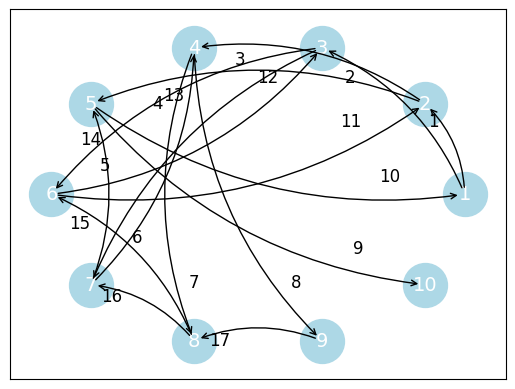

In [34]:
g = Graph(10)
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 2)
g.add_edge(2, 4, 3)
g.add_edge(2, 5, 4)
g.add_edge(3, 6, 5)
g.add_edge(3, 7, 6)
g.add_edge(4, 8, 7)
g.add_edge(4, 9, 8)
g.add_edge(5, 10, 9)
g.add_edge(5, 1, 10)
g.add_edge(6, 2, 11)
g.add_edge(6, 3, 12)
g.add_edge(7, 4, 13)
g.add_edge(7, 5, 14)
g.add_edge(8, 6, 15)
g.add_edge(8, 7, 16)
g.add_edge(9, 8, 17)
g.add_edge(9, 9, 18)
g.add_edge(10, 10, 19)

g.plot_graph()

In [37]:
sa,da,pa = DijkstraAlgo_A(g, 1)
sb,db,pb = DijkstraAlgo_B(g, 1)

print(da)
print(db)

#[(0, 0), (inf, 1), (inf, 2), (inf, 3), (inf, 4), (inf, 5), (inf, 6), (inf, 7), (inf, 8), (inf, 9)]


[0, 1, 2, 4, 5, 7, 8, 11, 12, 14]
[0, 1, 2, 4, 5, 7, 8, 11, 12, 14]


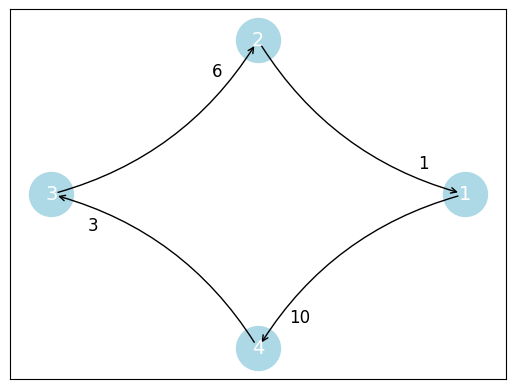

1 ->  (4, 10) 

2 ->  (1, 1) 

3 ->  (2, 6) 

4 ->  (3, 3) 



In [20]:
g = generate_random_graph(4)
g[0].plot_graph()
g[0].print_list()

In [21]:
g[0].print_list()

1 ->  (4, 10) 

2 ->  (1, 1) 

3 ->  (2, 6) 

4 ->  (3, 3) 



10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


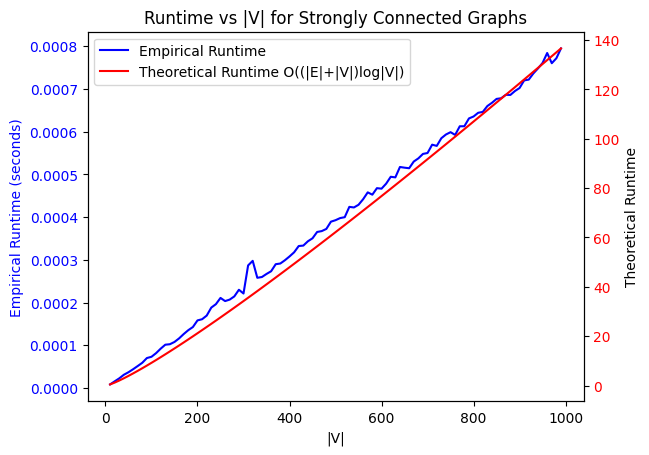

In [40]:
import math
import time, random, matplotlib.pyplot as plt 

sizes = range(10, 1000, 10)
runtime = []
runtime_theory = []
edges_list = []
runs = 100   

for size in sizes: 
    g,edges = generate_random_graph(size)
    elapsed_time = 0    
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        # print(S, d, pi)
        elapsed_time += time.time() - start_time 

    print(size)
    # print("Elapsed Time: {:2}s".format(elapsed_time))

    # Calculate the theoretical runtime
    edges_list.append(edges)
    runtime_theory.append(((size+edges)*math.log(size))/runs)
    runtime.append(elapsed_time/runs)

# Create a new figure with two subplots, sharing the x-axis
fig, ax1 = plt.subplots()

# plot the empirical runtime on the first axis
ax1.plot(sizes, runtime, label="Empirical Runtime", color="blue")
ax1.set_xlabel('|V|')
# ax1.set_xlabel('|E|')
ax1.set_ylabel('Empirical Runtime (seconds)', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title('Runtime vs |V| for Strongly Connected Graphs')

# create a second y-axis on the right-hand side of the chart
ax2 = ax1.twinx()

# plot the theoretical runtime on the second axis
ax2.plot(sizes, runtime_theory, label="Theoretical Runtime O((|E|+|V|)log|V|)", color="red")
ax2.set_ylabel('Theoretical Runtime')
ax2.tick_params(axis='y', labelcolor="red")

# add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

# show the chart
plt.show()


In [ ]:
print(edges_list)
print(sizes)

[29, 89, 149, 206, 268, 328, 388, 446, 506, 569, 626, 688, 749, 807, 867, 924, 990, 1048, 1109, 1168, 1229, 1288, 1347, 1408, 1467]
range(10, 500, 20)
